In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [5]:
f = open('states.txt')
str_data = f.readlines() # read all lines and save into str_data
data = [[(element) for element in str.split()] \
        for str in str_data] # convert string to number
#data # imports the file data

In [6]:
data

[['Alabama', '1.00', '0.86', '0.00', '1.00'],
 ['Alaska', '1.00', '1.00', '0.00', '1.00'],
 ['Arizona', '1.00', '0.56', '1.00', '1.00'],
 ['Arkansas', '1.00', '1.00', '1.00', '1.00'],
 ['California', '0.00', '0.26', '0.00', '0.00'],
 ['Colorado', '0.50', '0.57', '0.00', '0.00'],
 ['Connecticut', '0.00', '0.00', '0.00', '0.00'],
 ['Delaware', '0.00', '0.00', '0.00', '0.00'],
 ['Florida', '0.50', '0.59', '1.00', '1.00'],
 ['Georgia', '1.00', '0.71', '1.00', '1.00'],
 ['Hawaii', '0.00', '0.00', '0.00', '0.00'],
 ['Idaho', '1.00', '1.00', '0.00', '1.00'],
 ['Illinois', '0.50', '0.39', '1.00', '0.00'],
 ['Indiana', '0.50', '0.78', '1.00', '1.00'],
 ['Iowa', '1.00', '0.75', '1.00', '1.00'],
 ['Kansas', '1.00', '1.00', '1.00', '1.00'],
 ['Kentucky', '1.00', '0.83', '1.00', '1.00'],
 ['Louisiana', '1.00', '0.83', '0.00', '1.00'],
 ['Maine', '0.50', '0.50', '1.00', '0.00'],
 ['Maryland', '0.00', '0.13', '1.00', '0.00'],
 ['Massachusetts', '0.00', '0.00', '1.00', '0.00'],
 ['Michigan', '0.00', '

In [7]:
states_only = []  # stores all of the states in the file
percentages = []  # getting all of the percentages from the file
for number, state in enumerate(data):
    states_only.append(state[0])
    percentages.append(state[1:])

In [8]:
percentages

[['1.00', '0.86', '0.00', '1.00'],
 ['1.00', '1.00', '0.00', '1.00'],
 ['1.00', '0.56', '1.00', '1.00'],
 ['1.00', '1.00', '1.00', '1.00'],
 ['0.00', '0.26', '0.00', '0.00'],
 ['0.50', '0.57', '0.00', '0.00'],
 ['0.00', '0.00', '0.00', '0.00'],
 ['0.00', '0.00', '0.00', '0.00'],
 ['0.50', '0.59', '1.00', '1.00'],
 ['1.00', '0.71', '1.00', '1.00'],
 ['0.00', '0.00', '0.00', '0.00'],
 ['1.00', '1.00', '0.00', '1.00'],
 ['0.50', '0.39', '1.00', '0.00'],
 ['0.50', '0.78', '1.00', '1.00'],
 ['1.00', '0.75', '1.00', '1.00'],
 ['1.00', '1.00', '1.00', '1.00'],
 ['1.00', '0.83', '1.00', '1.00'],
 ['1.00', '0.83', '0.00', '1.00'],
 ['0.50', '0.50', '1.00', '0.00'],
 ['0.00', '0.13', '1.00', '0.00'],
 ['0.00', '0.00', '1.00', '0.00'],
 ['0.00', '0.64', '1.00', '1.00'],
 ['0.00', '0.38', '0.00', '0.00'],
 ['1.00', '0.75', '1.00', '1.00'],
 ['0.50', '0.75', '1.00', '1.00'],
 ['0.50', '1.00', '0.00', '1.00'],
 ['1.00', '1.00', '1.00', '1.00'],
 ['0.50', '0.25', '1.00', '0.00'],
 ['0.50', '0.00', '0

In [4]:
for percent in percentages:
    percent[0], percent[1] = percent[1], percent[0]

In [9]:
states_only

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'NewHampshire',
 'NewJersey',
 'NewMexico',
 'NewYork',
 'NorthCarolina',
 'NorthDakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'RhodeIsland',
 'SouthCarolina',
 'SouthDakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'WestVirginia',
 'Wisconsin',
 'Wyoming']

In [5]:
states = pd.DataFrame({'States': states_only})
states

,States
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [6]:
percents = pd.DataFrame(percentages,
                    columns = ['Senators', 'Congressmen', 'Governors', 'Electoral College'])
percents

,Senators,Congressmen,Governors,Electoral College
0,0.86,1.00,0.00,1.00
1,1.00,1.00,0.00,1.00
2,0.56,1.00,1.00,1.00
3,1.00,1.00,1.00,1.00
4,0.26,0.00,0.00,0.00
5,0.57,0.50,0.00,0.00
6,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,0.59,0.50,1.00,1.00
9,0.71,1.00,1.00,1.00


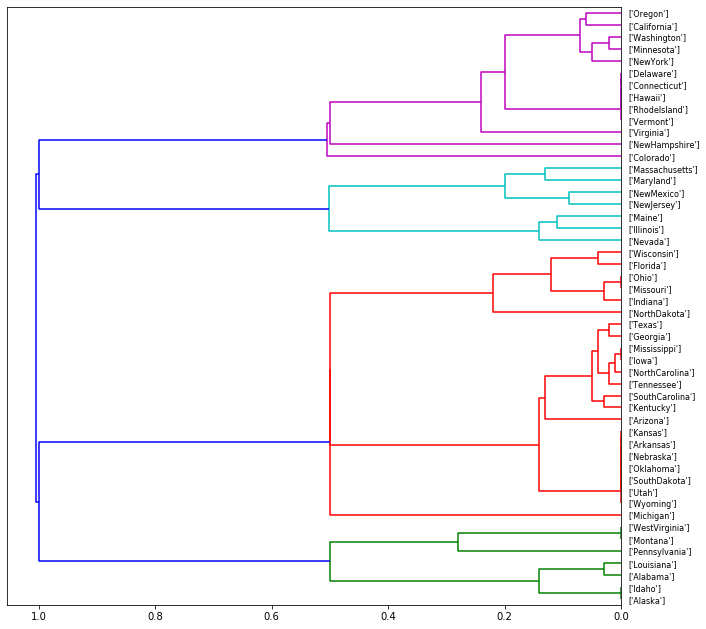

In [7]:
# single linkage
plt.figure(figsize=(11,11))
x = percents.values
y = pdist(x)
z = linkage(y, 'single')
d = dendrogram(z,
              orientation = 'left',
              labels = states.values)

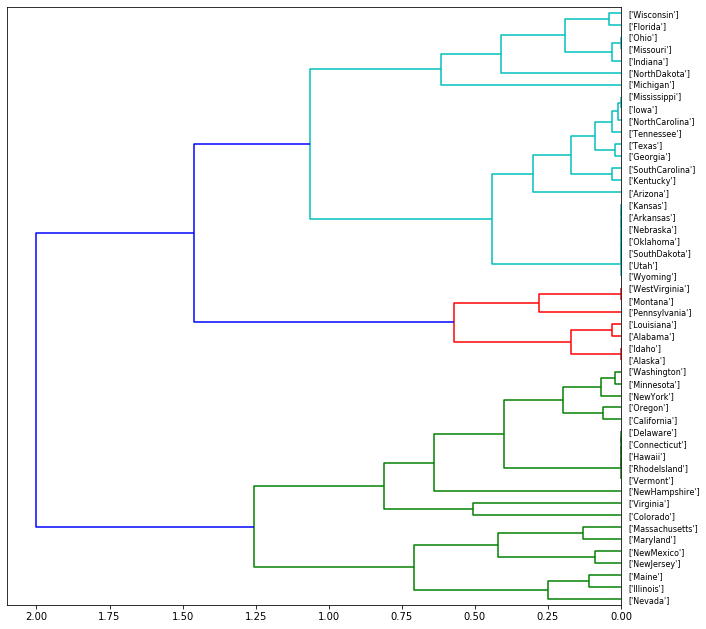

In [8]:
# complete linkage
plt.figure(figsize= (11,11))
z = linkage(y, 'complete')
d = dendrogram(z,
              orientation = 'left',
              labels = states.values)

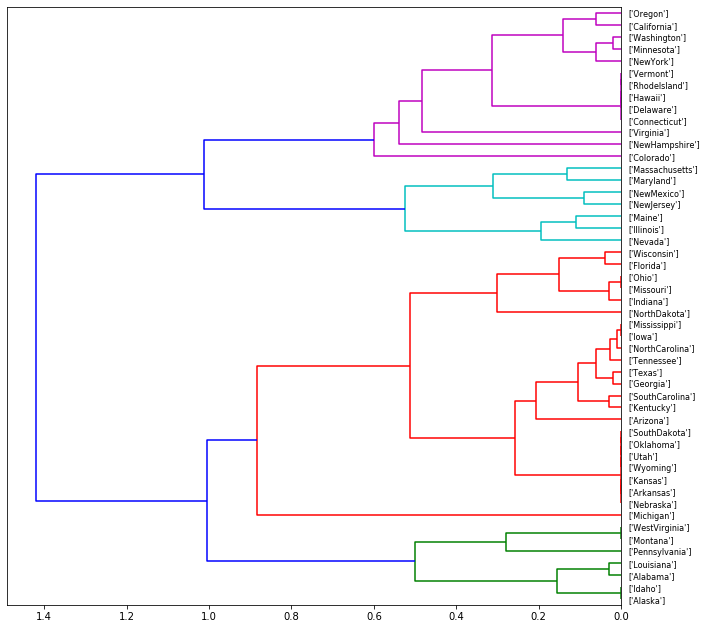

In [9]:
# centroid linkage
plt.figure(figsize= (11,11))
z = linkage(y, 'centroid')
d = dendrogram(z,
              orientation = 'left',
              labels = states.values)

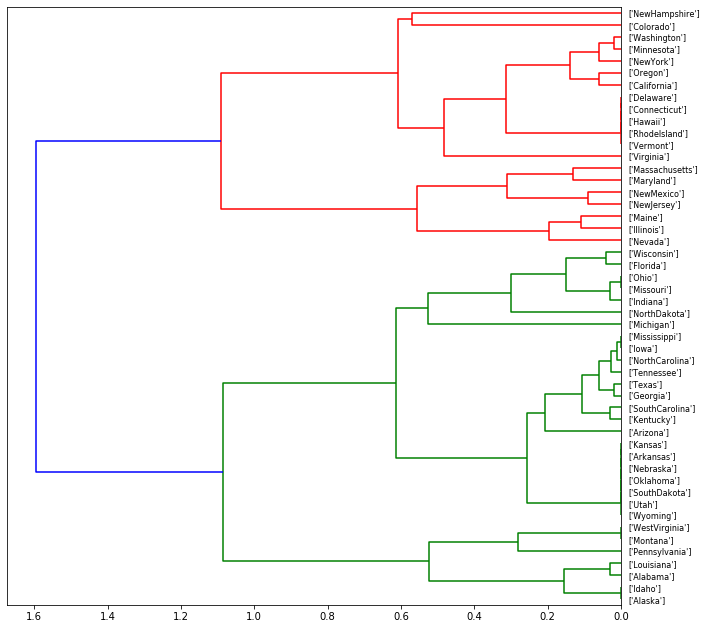

In [10]:
# average linkage
plt.figure(figsize= (11,11))
z = linkage(y, 'average')
d = dendrogram(z,
              orientation = 'left', 
              labels = states.values)

# III)

In [11]:
#Common characteristics between the states are that if the congressman, electorol college, and governors are the same then the next
# ... characteristics is to check the senators percents. If the sentors percent is similar as well as to all the other catogories percent then
# ... those two states are closely connected together because they are so similair. 

#If there are multiple pairs with the same governor, electoral colleges, and congressman percent but their percents are not common or similair then they are connect 
# ... but not instantaly, if that makes sense.

#The number on the x-axis is the distance between each state as far as sentors percent and other common characteristics i.e
# ... Congressman, governors, electoral college.

# Question #2

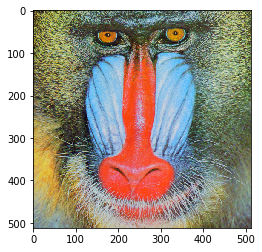

In [12]:
data = plt.imread('mandrill.tiff')
plt.imshow(data)

In [29]:
data

array([[[164, 150,  71],
        [ 63,  57,  31],
        [ 75,  43,  10],
        ...,
        [117, 119,  68],
        [141, 170, 101],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  33],
        [ 55,  35,  23],
        ...,
        [122, 140,  98],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 99,  74,  31],
        [132, 118,  46],
        [ 60,  41,  36],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  49]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [117, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  84,  68],
        [ 99,  69,  86],
        [ 80,  63,  71]],

       [[  9,  11,  12],
        [ 10,  12,  11],
        [ 11,  15,  12],
        ...,
        [  5,   8,   5],
        [  2,   5,   0],
        [  4,   5,   2]]

In [27]:
data.shape

(512, 512, 3)

In [17]:
def color_quantization(k):
    centroids = np.zeros((k, 3)) #creates the centroids
    energy_list = [] # keeps count of the energy vs iterations which is 10
    for j in range(k):
        r = np.random.randint(0, 511, size = 2) #random number for the centroids
        centroids[j,:] = data[r[0], r[1],:]
    index = np.zeros(data.shape[:2])
    belongings = np.zeros((512,512))
    for m in range(10): #we are looping through a total of 10 
        for n in range(data.shape[0]):
            for p in range(data.shape[1]):
                pixel = data[n,p,:]
                distance = np.zeros((k,1))
                for l in range(k):
                    distance[l] = np.linalg.norm(pixel-centroids[l]) # calculating the distance
                belongings[n,p] = np.argmin(distance)
        energy = 0
        for i in range(k):
            energy = energy + np.sum(np.linalg.norm(data[belongings == i]-centroids[i],axis=1)**2)
        energy_list.append(energy)
        for m in range(k):
            centroids[m] = np.sum(data[belongings == m], axis = 0) / data[belongings == m].shape[0]
    new_data = np.zeros_like(data)
    for n in range(data.shape[0]):
        for p in range(data.shape[1]):
            new_data[n,p] = centroids[int(belongings[n,p])]
    plt.figure(figsize = (18,8))
    plt.subplot(1,3,1)
    plt.title(f"K = {k}")
    plt.imshow(new_data) 
    plt.subplot(1,3,2)
    plt.title("Original")
    plt.imshow(data)
    plt.subplot(1,3,3)
    plt.plot(energy_list)

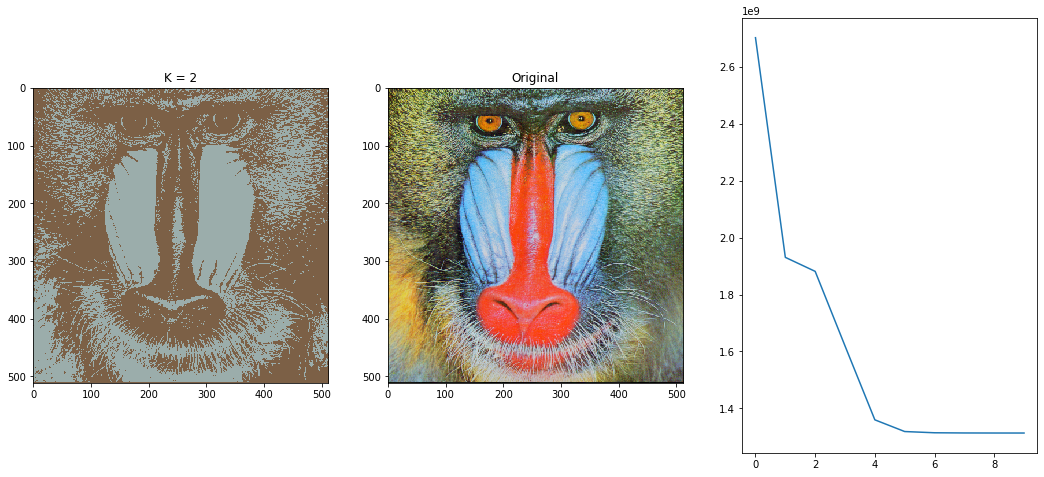

In [28]:
color_quantization(2) 

#converges at around 1.5/2

# with only two clusters the picture is not  as clear. 
# The colors are on a black ad white scale.

In [ ]:
color_quantization(4) 

#converges at around 3

#the colors are dulland closer to the original picture, but more clusters are still needed

In [ ]:
color_quantization(8) 

#converges at around 4.5/5

#The colors are more prominent, but not as clear as the original picture